## Import packages

In [89]:
import os
import warnings

import librosa
import numpy as np
import scipy.io.wavfile
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

from preprocess_mfc_util import audio_to_mfc

warnings.filterwarnings('ignore')

## Obtain file paths of AudioMNIST wav files

In [90]:
audio_dir = './audio_samples'

In [91]:
male_wav_fpaths = [f'{audio_dir}/male/{f}' for f in os.listdir(audio_dir + '/male')]
female_wav_fpaths = [f'{audio_dir}/female/{f}' for f in os.listdir(audio_dir + '/female')]

In [92]:
# Ensure same order across runs
np.random.seed(13)
np.random.shuffle(male_wav_fpaths)
np.random.shuffle(female_wav_fpaths)

In [93]:
wav_fpaths = male_wav_fpaths + female_wav_fpaths

In [94]:
print(wav_fpaths[0:9])

['./audio_samples/male/daniel-de-5.wav', './audio_samples/male/mike-en-7.wav', './audio_samples/male/martin-en-6.wav', './audio_samples/male/mike-de-8.wav', './audio_samples/male/mike-en-4.wav', './audio_samples/male/mike-de-3.wav', './audio_samples/male/daniel-en-5.wav', './audio_samples/male/daniel-de-1.wav', './audio_samples/male/daniel-de-2.wav']


### Obtain max samples (per audio sample)

In [95]:
sample_rate = librosa.core.get_samplerate(wav_fpaths[0]) # assume all same sample rate (?!)
max_duration = 0.9999583333333333 # slightly less than 1s
max_samples = int(max_duration * sample_rate)

## Output MFC JPEGs

In [96]:
mfc_dataset_dir = 'mfc_dataset_train_test'

  0%|          | 0/60 [00:00<?, ?it/s]

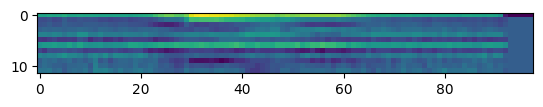

In [97]:
for i, fp in tqdm_notebook(enumerate(male_wav_fpaths), total=len(male_wav_fpaths)):
    _, fn = os.path.split(fp)
    if not fn.endswith('wav'):
        continue
    _, audio_input = scipy.io.wavfile.read(fp)
    mfc = audio_to_mfc(audio_input, sample_rate, max_samples)
    if i == 0:
        plt.imshow(mfc)
    plt.imsave(f'{mfc_dataset_dir}/test/male/{fn.replace("wav", "jpg")}', mfc)

  0%|          | 0/81 [00:00<?, ?it/s]

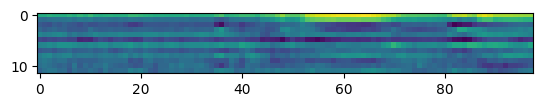

In [98]:
for i, fp in tqdm_notebook(enumerate(female_wav_fpaths), total=len(female_wav_fpaths)):
    _, fn = os.path.split(fp)
    if not fn.endswith('wav'):
        continue
    _, audio_input = scipy.io.wavfile.read(fp)
    mfc = audio_to_mfc(audio_input, sample_rate, max_samples)
    if i == 0:
        plt.imshow(mfc)
    plt.imsave(f'{mfc_dataset_dir}/test/female/{fn.replace("wav", "jpg")}', mfc)